# Image Basics

&copy; 李浩东 3190104890@zju.edu.cn

- Brief introduction of `OpenCV`
- Pixels, colors, and image formats


# OpenCV

- `OpenCV` is an open source computer vision library written in C/C++ language
- `OpenCV` contains more than 500 functions derived from various fields of computer vision
    - Image segmentation
    - Face recognition
    - Action recognition
    - Motion tracking
    - Motion analysis

- The image is treated as a matrix in the computer

In [1]:
import pandas as pd
import numpy as np

data_file = ".\data\cat.csv"
cat = pd.read_csv(data_file)
cat

,R,G,B
0,213,218,222
1,213,218,222
2,213,218,222
3,213,218,222
4,213,218,222
...,...,...,...
243044,216,219,226
243045,216,219,226
243046,215,218,225
243047,215,218,225


In [2]:
print(cat.shape)
print(type(cat))
# define matrix
width = height = 493
cat_rgb = []
for i in range(height):
    row = []
    for j in range(width):
        index = i * height + j
        rgb_element = [cat.at[index, 'R'], cat.at[index, 'G'], cat.at[index, 'B']]
        row.append(rgb_element)
    cat_rgb.append(row)
# data type transfermation
cat_rgb = np.array(cat_rgb)
print(cat_rgb.shape)
print(type(cat_rgb))

(243049, 3)
<class 'pandas.core.frame.DataFrame'>
(493, 493, 3)
<class 'numpy.ndarray'>


In [3]:
print(cat_rgb)
# 493 rows
# 493 rgb elements in each row

[[[213 218 222]
  [213 218 222]
  [213 218 222]
  ...
  [151 155 158]
  [150 154 157]
  [149 153 156]]

 [[213 218 222]
  [213 218 222]
  [213 218 222]
  ...
  [145 149 152]
  [144 148 151]
  [143 147 150]]

 [[213 218 222]
  [213 218 222]
  [213 218 222]
  ...
  [141 145 148]
  [140 144 147]
  [139 143 146]]

 ...

 [[ 19  18  14]
  [ 19  18  14]
  [ 19  18  14]
  ...
  [215 218 225]
  [215 218 225]
  [215 218 225]]

 [[ 19  18  14]
  [ 19  18  14]
  [ 18  17  13]
  ...
  [215 218 225]
  [215 218 225]
  [215 218 225]]

 [[ 19  18  14]
  [ 18  17  13]
  [ 18  17  13]
  ...
  [215 218 225]
  [215 218 225]
  [215 218 225]]]


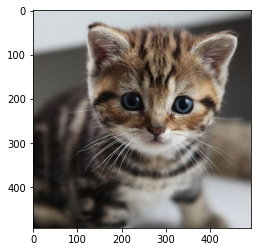

In [4]:
from matplotlib import pyplot as plt
import matplotlib.colors as mat_color

no_norm = mat_color.Normalize(vmin=0, vmax=255, clip=False)
plt.imshow(cat_rgb, norm=no_norm)

# Image formats

- Just shown is the `RGB` image type, which is in line with human vision
- In addition to the `RGB` series, common color spaces include `HSV`, `HSL`, `XYZ`, etc.
    - `Hue`
    - `Saturation` 
    - `Value/Lightness` 
- In image recognition, `RGB` is easily affected by light
    - Manual compensation through programming
    - Convert it into `HSV` mode

- `RGB -> HSV`

$$
s_{\mathrm{HSV}}=\frac{\max \{r, g, b\}-\min \{r, g, b\}}{\max \{r, g, b\}}
$$


- `HSV -> RGB`

$$
\begin{aligned}
c_{1} &=\left\lfloor h^{\prime}\right\rfloor \\
c_{2} &=h^{\prime}-c_{1} \\
w_{1} &=\left(1-s_{\mathrm{HSV}}\right) \cdot v \\
w_{2} &=\left(1-s_{\mathrm{HSV}} \cdot c_{2}\right) \cdot v \\
w_{3} &=\left(1-s_{\mathrm{HSV}} \cdot\left(1-c_{2}\right)\right) \cdot v \\
\left(\begin{array}{l}
r \\
g \\
b
\end{array}\right) &= \begin{cases}\left(v, w_{3}, w_{1}\right)^{\mathrm{T}} & \text { if } c_{1}=0 \\
\left(w_{2}, v, w_{1}\right)^{\mathrm{T}} & \text { if } c_{1}=1 \\
\left(w_{1}, v, w_{3}\right)^{\mathrm{T}} & \text { if } c_{1}=2 \\
\left(w_{1}, w_{2}, v\right)^{\mathrm{T}} & \text { if } c_{1}=3 \\
\left(w_{3}, w_{1}, v\right)^{\mathrm{T}} & \text { if } c_{1}=4 \\
\left(v, w_{1}, w_{2}\right)^{\mathrm{T}} & \text { if } c_{1}=5\end{cases}
\end{aligned}
$$

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

path = "./images/cat.jpg"
# read original BGR image
img_bgr = cv2.imread(path)
print("image loaded")

image loaded


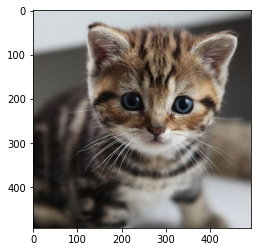

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, norm=no_norm)

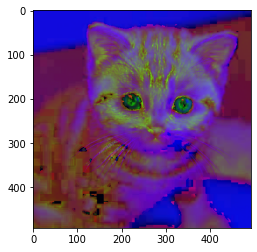

In [7]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv, norm=no_norm)

# Application of OpcnCV

- Filtering, binarization, cutting, scale and rotation transformations, image gradients
- Line and circle detection, feature point detection, edge detection, blob detection, feature point detection, pattern recognition
    - QR code identification
    - Face detection
    - Gesture recognition
    - Human gesture recognition

![opencv_0](./images/opencv_0.jpg)

![opencv](./images/opencv_1.jpg)

![opencv](./images/opencv_2.jpg)

![opencv](./images/opencv_3.jpg)